In [1]:
from IPython.core.display import display, HTML
from graphviz import Digraph

class test_graph:
    def __init__(self):
        self.nodes = {}
        self.traverse_order = None # in what order were nodes checked?
        self.next_guess = 0
        self.colors = {}

    def node(self, name):
        name = str(name).upper()
        self.nodes[name] = Node(self, name)

    def edge(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        g = Digraph(engine='neato')
        for n in self.nodes:
            g.node(n, fillcolor=self.colors.get(n, "white"), style="filled")
            children = self.nodes[n].children
            for i, child in enumerate(children):
                g.edge(n, child.name, penwidth=str(len(children) - i), len="1.5")
        return g._repr_svg_()

    def dfs(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        self.traverse_order = []
        self.next_guess = 0
        self.colors = {}
        self.visited = set()
        self.path = self.nodes[src].dfs(dst)
        display(HTML("now call .visit(???) to identify the first node explored"))
        display(self)

    def bfs(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        self.traverse_order = []
        self.next_guess = 0
        self.colors = {}
        self.path = self.nodes[src].bfs(dst)
        display(HTML("now call .visit(???) to identify the first node explored"))
        display(self)
    
    def visit(self, name):
        name = str(name).upper()
        if self.traverse_order == None:
            print("please call dfs or bfs first")
        if self.next_guess == len(self.traverse_order):
            print("no more nodes to explore")
            return
        self.colors = {}
        for n in self.traverse_order[:self.next_guess]:
            self.colors[n] = "yellow"
        if name == self.traverse_order[self.next_guess]:
            display(HTML("Correct..."))
            self.colors[name] = "yellow"
            self.next_guess += 1
        else:
            display(HTML("<b>Oops!</b> Please guess again."))
            self.colors[name] = "red"
        display(self)
        if self.next_guess == len(self.traverse_order):
            if self.path == None:
                display(HTML("You're done, there is no path!"))
            else:
                seq = input("What path was found? [enter nodes, comma separated]: ")
                seq = tuple(map(str.strip, seq.upper().split(",")))
                if seq == tuple(map(str.upper, self.path)):
                    print("Awesome!!!")
                else:
                    print("actually, expected was: ", ",".join(self.path))

    
class Node:
    def __init__(self, graph, name):
        self.graph = graph
        self.name = name
        self.children = []

    def __repr__(self):
        return "node %s" % self.name

    def dfs(self, dst):
        if self.name in self.graph.visited:
            return None
        
        self.graph.traverse_order.append(self.name)
        
        self.graph.visited.add(self.name)

        if self.name == dst:
            return (self.name, )
        for child in self.children:
            childpath = child.dfs(dst)
            if childpath:
                return (self.name, ) + childpath
        return None

    def backtrace(self):
        nodes = []
        node = self
        while node != None:
            nodes.append(node.name)
            node = node.back
        return tuple(reversed(nodes))

    def bfs(self, dst):
        added = set()
        todo = [self]
        self.back = None
        added.add(self.name)

        while len(todo) > 0:
            curr = todo.pop(0)
            self.graph.traverse_order.append(curr.name)

            if curr.name == dst:
                return curr.backtrace()
            else:
                for child in curr.children:
                    if not child.name in added:
                        todo.append(child)
                        child.back = curr
                        added.add(child.name)

        return None

# Practice 1

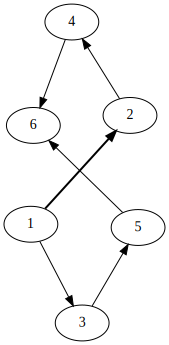

In [2]:
g = test_graph()
g.edge(1, 2)
g.edge(1, 3)
g.edge(2, 4)
g.edge(3, 5)
g.edge(5, 6)
g.edge(4, 6)
g.bfs(1, 6)

# Practice 2

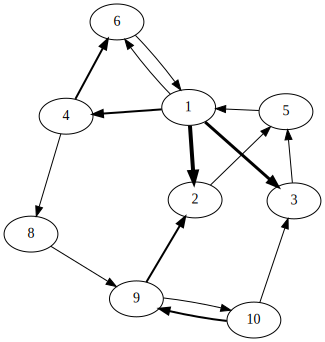

In [3]:
# designed by anonymous
g = test_graph()
g.edge(1,2)
g.edge(1,3)
g.edge(1,4)
g.edge(2, 5)
g.edge(3,5)
g.edge(5,1)
g.edge(6,1)
g.edge(4,6)
g.edge(4,8)
g.edge(8,9)
g.edge(9,2)
g.edge(9,10)
g.edge(10,9)
g.edge(10,3)
g.edge(1,6)
g.bfs(2,10)

# Practice 3

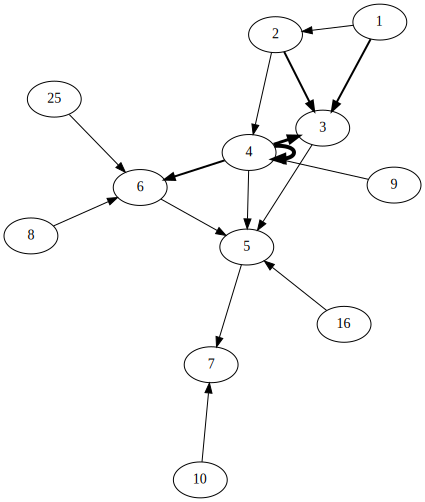

In [4]:
g = test_graph()
for i in range(1, 6, 1):
    g.edge(2*i, i+2)
    g.edge(i, i+2)
    g.edge(i**2, i+1)
g.edge(4, 5)
g.bfs(1, 6)

# Practice 4

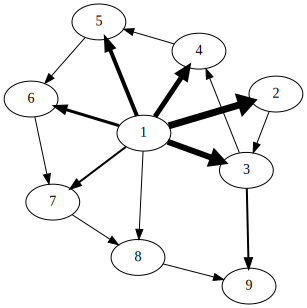

In [5]:
g = test_graph()

for i in range(2,9):
    g.edge(1,i)
    if i == 2:
        g.edge(2,3)
        continue
    if i == 3:
        g.edge(3,9)
    g.edge(i,  i+1)
    
g.dfs(1,9)

# Practice 5

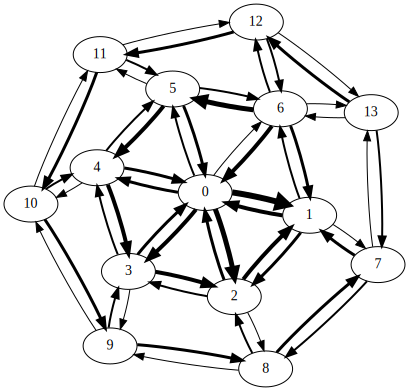

In [6]:
g = test_graph()
for i in range(1, 6):
    g.edge(0, i)
    g.edge(i, 0)
    g.edge(i, i+1)
    g.edge(i+1, i)
g.edge(6,0)
g.edge(0,6)
g.edge(6,1)
g.edge(1,6)
for i in range(1, 7):
    g.edge(i, i+6)
    g.edge(i+6, i)
    g.edge(i+6, i+7)
    g.edge(i+7, i+6)
g.edge(7,13)
g.edge(13,7)
g.edge(6,13)
g.edge(13,6)
g.bfs(0, 11)

# Practice 6

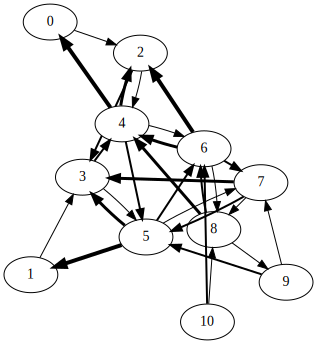

In [7]:
g = test_graph()
for i in range(7):
    g.edge(i,i+2)
    g.edge(i+4,i)
    g.edge(i+4,i+2)
    g.edge(i+2,i+3)
g.bfs(0, 4)

# Practice 7

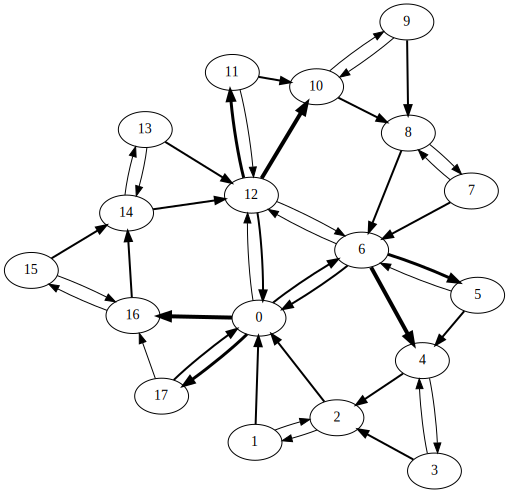

In [8]:
# designed by nicholas beninato
nodes = list(range(18)) # should be multiple of 6
def next(index):
    if index == nodes[-1]:
        return 0
    return index + 1

def prev(index):
    if index == 0:
        return nodes[-1]
    return index - 1

g = test_graph()
for i in nodes:
    for j in nodes:
        if i == next(j):
            g.edge(i, j)
        if j % 2 == 0 and i == prev(j):
            g.edge(i, j)
        if j % 2 == 0 and i == next(next(j)):
            g.edge(i, j)

for i in nodes: # can comment out these loops to get rid of "inner" edges
    for j in nodes:
        if i % 6 == 0 and j % 6 == 0 and j != i:
            g.edge(j, i)
# g.dfs(0,8) # 0,16,14,12,10,8 (18 nodes)
g.bfs(3, 12) # 3,2,0,12 (18 nodes)

# Practice 8

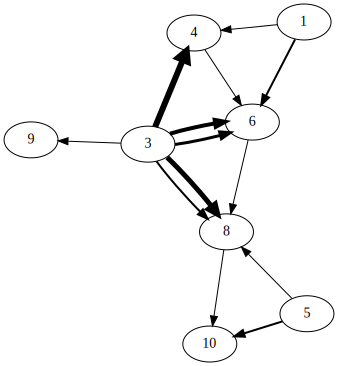

In [9]:
g = test_graph()
for i in range(1,7,2):
    g.edge(i+3,i+5)
    g.edge(i,i+5)
    g.edge(1+2,i+3)
    g.edge(i,i+3)
g.edge(3,9)
g.bfs(3,5)